 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

# Разбиение выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
# Евклидова метрика
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

# Точность
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [4]:
# Алгоритм KNN с добавлением весов 𝑤(𝑑)=𝑞**𝑑 ,  𝑞∈(0,1) ;
def knn_wqd(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            wqd = q**d[0]
            classes[d[1]] += wqd
            
        # Записываем в список ответов класс с наибольшим весом
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [5]:
k, q = 1, 0.1
y_pred = knn_wqd(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1, q = 0.1: 0.667


In [6]:
k, q = 1, 0.9
y_pred = knn_wqd(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1, q = 0.9: 0.667


In [7]:
k, q = 3, 0.1
y_pred = knn_wqd(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3, q = 0.1: 0.733


In [8]:
k, q = 3, 0.9
y_pred = knn_wqd(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3, q = 0.9: 0.733


In [9]:
k, q = 5, 0.1
y_pred = knn_wqd(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5, q = 0.1: 0.867


In [10]:
k, q = 5, 0.9
y_pred = knn_wqd(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5, q = 0.9: 0.867


При таком способе подсчета точность модели не меняется с изменением q, скорее всего, из-за того, что расстояния между всеми точками достаточно малы и разница практически не меняет предсказание.

In [11]:
# Алгоритм KNN с добавлением весов 𝑤(i)=𝑞**i ,  𝑞∈(0,1) ;
def knn_wi(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for j, d in enumerate(sorted(test_distances)[0:k]):
            wi = q**j
            classes[d[1]] += wi
            
        # Записываем в список ответов класс с наибольшим весом
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [12]:
k, q = 1, 0.1
y_pred = knn_wi(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1, q = 0.1: 0.667


In [13]:
k, q = 1, 0.9
y_pred = knn_wi(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1, q = 0.9: 0.667


In [14]:
k, q = 3, 0.1
y_pred = knn_wi(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3, q = 0.1: 0.667


In [15]:
k, q = 3, 0.9
y_pred = knn_wi(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3, q = 0.9: 0.733


In [16]:
k, q = 5, 0.1
y_pred = knn_wi(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5, q = 0.1: 0.667


In [17]:
k, q = 5, 0.9
y_pred = knn_wi(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5, q = 0.9: 0.867


При больших q точность алгоритма возрастает с увеличением количества соседей, а при малых нет - видимо, потому, что в этом случае наибольший влияние имеет первый сосед, а с дальними соседями вес получается столь мал, что они перестают влиять на модель.

 2*. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [18]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [19]:
def mean_sq_inclass_dist(centroids, clusters):
    inclass_distances = {}
    sum_inclass_distances = 0
    for key in clusters:
        sq_distance = 0
        for value in clusters[key]:
            distance = e_metrics(value, centroids[key])
            sq_distance += distance**2
        inclass_distances[key] = sq_distance/len(clusters[key])
        sum_inclass_distances += inclass_distances[key]
    mean_distance = sum_inclass_distances/len(inclass_distances)
    return inclass_distances, mean_distance

In [20]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

x = np.arange(1, 11)
y = []
for k in x:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    inclass_distances, mean_distance = mean_sq_inclass_dist(centroids, clusters)
    y.append(mean_distance)

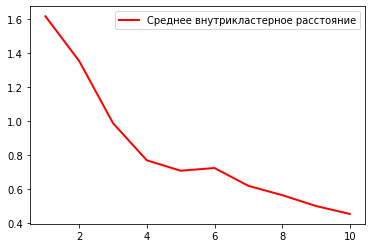

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y,
        linestyle = '-',
        linewidth = 2,
        color = 'r',
       label='Среднее внутрикластерное расстояние')
ax.legend()

С увеличением количества кластеров внутрикластерное расстояние уменьшается, что логично.